# Pokemon Battle EDA #

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
pd.set_option('display.max_columns', 100)

In [326]:
import scipy.stats as stats

In [327]:
battles = pd.read_csv('data/pokemon_battle_final.csv').drop('Unnamed: 0', axis=1)
print(battles.shape)
battles.head()

(50000, 35)


,id_p1,name_p1,type1_p1,type2_p1,hp_p1,atk_p1,def_p1,spatk_p1,spdef_p1,spd_p1,gen_p1,legendary_p1,type_combo_p1,two_type_p1,stat_total_p1,mega_p1,mega_leg_p1,id_p2,name_p2,type1_p2,type2_p2,hp_p2,atk_p2,def_p2,spatk_p2,spdef_p2,spd_p2,gen_p2,legendary_p2,type_combo_p2,two_type_p2,stat_total_p2,mega_p2,mega_leg_p2,p1_winner
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,679,Accelgor,Bug,NaN,80,70,40,100,60,145,5,0,NaN,0,495,0,0,0
1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,43,Vulpix,Fire,NaN,38,41,40,50,65,65,1,0,NaN,0,299,0,0,0
2,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,0,Dragon-Flying,1,600,0,0,0
3,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,714,Keldeo Ordinary Forme,Water,Fighting,91,72,90,129,90,108,5,0,Water-Fighting,1,580,0,0,0
4,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,194,Mareep,Electric,NaN,55,40,40,65,45,35,2,0,NaN,0,280,0,0,1


In [329]:
# palette to match Pokemon types to colors from the games
color_dict = {'Normal':'#A8A77A', 'Fire':'#EE8130', 'Water':'#6390F0', 'Electric':'#FFF200', 'Grass':'#7AC74C',
              'Ice':'#96D9D6', 'Fighting':'#C22E28', 'Poison':'#A33EA1', 'Ground':'#E2BF65', 'Flying':'#A98FF3', 
              'Psychic': '#F95587', 'Bug':'#A6B91A', 'Rock':'#B6A136', 'Ghost':'#735797', 'Dragon':'#6F35FC',
              'Dark':'#705746', 'Steel':'#B7B7CE', 'Fairy':'#D685AD'}

## Winners/Losers Characteristics ##

### Stat Total Analysis ###

In [330]:
battles.p1_winner.value_counts(normalize=True)

0    0.52798
1    0.47202
Name: p1_winner, dtype: float64

In [331]:
temp = battles.copy()

In [332]:
temp['stat_diff'] = temp.stat_total_p1 - temp.stat_total_p2

In [333]:
temp.head()

,id_p1,name_p1,type1_p1,type2_p1,hp_p1,atk_p1,def_p1,spatk_p1,spdef_p1,spd_p1,gen_p1,legendary_p1,type_combo_p1,two_type_p1,stat_total_p1,mega_p1,mega_leg_p1,id_p2,name_p2,type1_p2,type2_p2,hp_p2,atk_p2,def_p2,spatk_p2,spdef_p2,spd_p2,gen_p2,legendary_p2,type_combo_p2,two_type_p2,stat_total_p2,mega_p2,mega_leg_p2,p1_winner,stat_diff
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,679,Accelgor,Bug,NaN,80,70,40,100,60,145,5,0,NaN,0,495,0,0,0,-177
1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,43,Vulpix,Fire,NaN,38,41,40,50,65,65,1,0,NaN,0,299,0,0,0,19
2,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,0,Dragon-Flying,1,600,0,0,0,-282
3,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,714,Keldeo Ordinary Forme,Water,Fighting,91,72,90,129,90,108,5,0,Water-Fighting,1,580,0,0,0,-262
4,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,194,Mareep,Electric,NaN,55,40,40,65,45,35,2,0,NaN,0,280,0,0,1,38


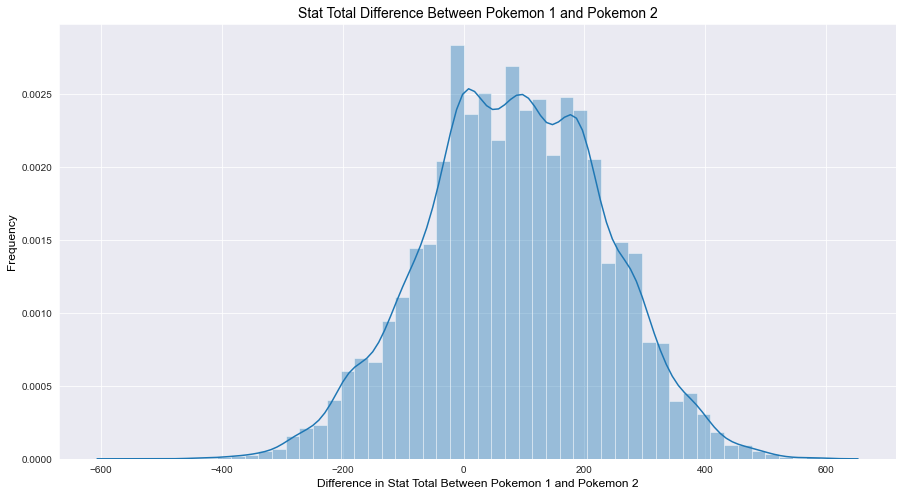

In [424]:
# distribution of difference in stat_total between Pokemon 1 and Pokemon 2
plt.figure(figsize=(15,8))

sns.distplot(temp[temp.p1_winner==1].stat_diff)
plt.title('Stat Total Difference Between Pokemon 1 and Pokemon 2', color='black', size=14)
plt.xlabel('Difference in Stat Total Between Pokemon 1 and Pokemon 2', color='black', size=12)
plt.ylabel('Frequency', color='black', size=12)
plt.show()

If a Pokemon wins, they generally have a greater `stat_total` than the opposing Pokemon. However, the histogram above shows that a Pokemon can still win even if they have a lower `stat_total` than their opponent. This tells us that winners are determined by more than a Pokemon's `stat_total`.

Is the difference in `stat_total` between Pokemon 1 and Pokemon 2 significant when Pokemon 1 wins compared to when Pokemon 1 loses?

- $H_{0}: \mu_{win} = \mu_{lose}$
- $H_{0}: \mu_{win} \neq \mu_{lose}$

In [336]:
stats.ttest_ind(temp[temp.p1_winner==1].stat_diff, temp[temp.p1_winner==0].stat_diff)

Ttest_indResult(statistic=119.12847670699867, pvalue=0.0)

Using $\alpha=0.05$, we conclude that there is a statistically significant difference in the mean stat difference between the two Pokemon when Pokemon 1 wins compared to when it loses. We can examine this further by looking at the distribution of `stat_total` between both Pokemon for each match. 

### Type Analysis ###

**Two-type Pokemon in Battle**

In the pokemon_stats_eda, we determined that two-type Pokemon are stronger than one-type Pokemon. Below, we check to see if two-type Pokemon win at higher rates than one-type Pokemon. 

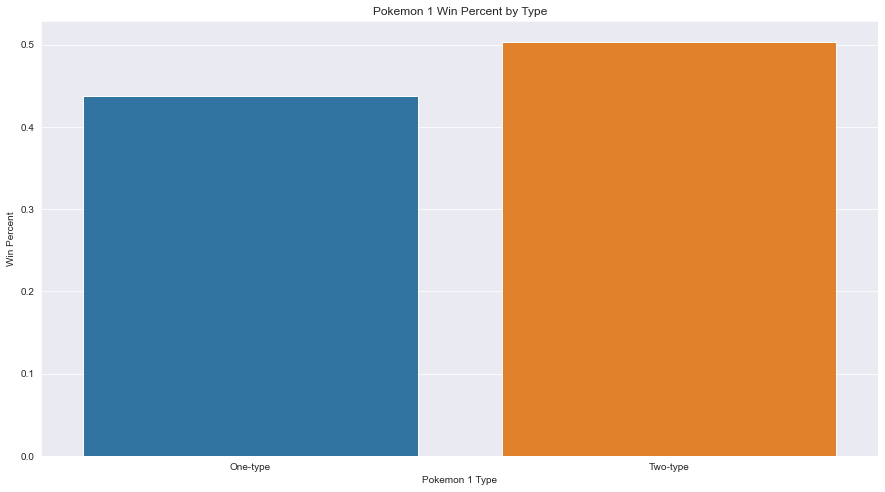

In [383]:
plt.figure(figsize=(15,8))

sns.barplot(x=['One-type', 'Two-type'], y=[temp[temp.two_type_p1==0].p1_winner.value_counts(normalize=True)[1],
                                           temp[temp.two_type_p1==1].p1_winner.value_counts(normalize=True)[1]])
plt.xlabel('Pokemon 1 Type')
plt.ylabel('Win Percent')
plt.title('Pokemon 1 Win Percent by Type', size=12)
plt.show()

In [422]:
temp[temp.two_type_p1==1].p1_winner.value_counts(normalize=True)[1]

0.5036774615888174

**Is win count independent of Pokemon type number?**

- $H_{0}:$ Pokemon type number and win count are independent
- $H_{A}:$ Pokemon type number and win count are dependent

In [418]:
one_type_wins = temp[temp.two_type_p1==0].p1_winner.value_counts()
two_type_wins = temp[temp.two_type_p1==1].p1_winner.value_counts()

In [419]:
# create contingency table
table = [[one_type_wins[0], one_type_wins[1]],
         [two_type_wins[0], two_type_wins[1]]]

stat, p, dof, expected = stats.chi2_contingency(table)
print(table)
print('dof=%d' % dof)
print(expected)

[[13510, 10521], [12889, 13080]]
dof=1
[[12687.88738 11343.11262]
 [13711.11262 12257.88738]]


In [420]:
# interpret the ciritical stat
prob = 0.95
critical = stats.chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=217.020
Dependent (reject H0)


Our chi-squared test shows us that win count is dependent on whether a Pokemon is one-type or two-type. In the bar chart above, we can see that one-type Pokemon only win about 44% of the time, while two-type Pokemon win about 50% of the time. 

**Best type in Battle**

In the pokemon_stats_eda, we determined that Dragon was the strongest type while Bug was the weakest. Do Dragon-type Pokemon win more often than any other type?

In [351]:
# create new Data Frame to better analyze win percentages by type
types = temp.type1_p1.unique()
matches_by_type = {'type': list(types), 
                   'losses': [temp[temp.type1_p1==t].p1_winner.value_counts()[0] for t in types],
                   'wins': [temp[temp.type1_p1==t].p1_winner.value_counts()[1] for t in types]}

In [352]:
# create new columns
wins_by_type = pd.DataFrame.from_dict(matches_by_type)
wins_by_type['match_total'] = wins_by_type.sum(axis=1)
wins_by_type['match_percent'] = wins_by_type.match_total / wins_by_type.match_total.sum(axis=0)
wins_by_type['win_percent'] = wins_by_type['wins'] / wins_by_type['match_total']

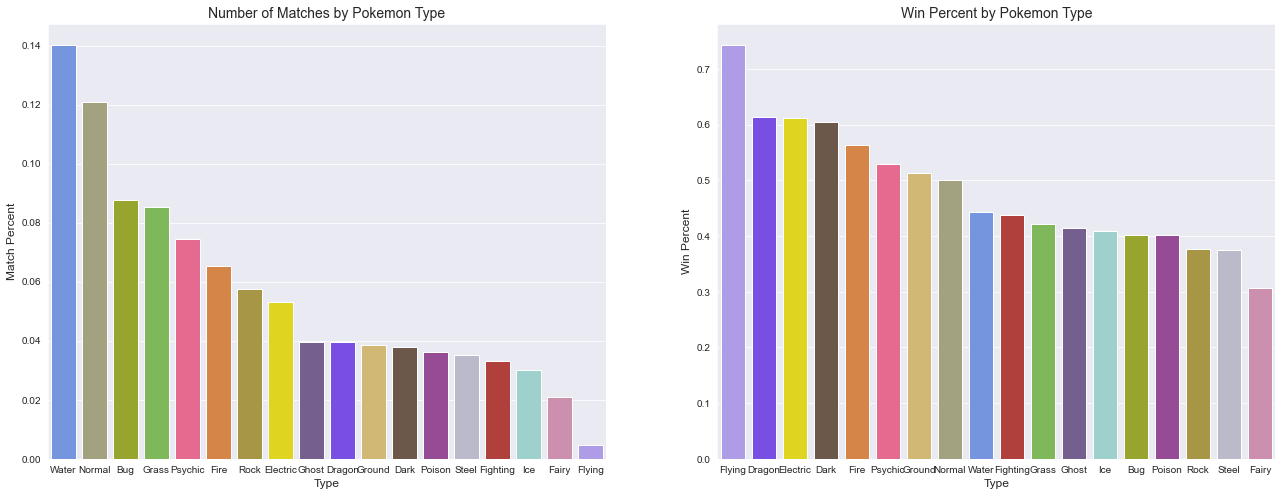

In [356]:
# plot matches and win percent for each type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))

sns.barplot(x='type', y='match_percent', data=wins_by_type.sort_values('match_percent', ascending=False), 
            palette=color_dict, ax=ax1)
ax1.set_title('Number of Matches by Pokemon Type', size=14)
ax1.set_xlabel('Type', size=12)
ax1.set_ylabel('Match Percent', size=12)

sns.barplot(x='type', y='win_percent', data=wins_by_type.sort_values('win_percent', ascending=False), 
            palette=color_dict, ax=ax2)
ax2.set_title('Win Percent by Pokemon Type', size=14)
ax2.set_xlabel('Type', size=12)
ax2.set_ylabel('Win Percent', size=12)
plt.show()

The above boxplots compare a Pokemon's match count with their win percent. We can see that the number of matches correspond to occurance of that type. In essence, since Water, Normal, Bug, Grass, and Psychic are the most common types, they participate in the most matches. However, we can also see that win percentages do not correspond with overall strength of a type (as indicated by `stat_total`), though Dragon-type  is the strongest overall type and leads in win percentages. Here, Flying has the highest win-percentage but less than 1% of Pokemon have Flying as their primary type and those that do are either legendary Pokemon or have a secondary Dragon-type which may have a greater effect. 

### Legendary vs Mega Pokemon ###

In [384]:
reg_wins = temp[(temp.mega_p1==0)&(temp.legendary_p1==0)&(temp.mega_leg_p1==0)].mean().p1_winner
mega_wins = temp[temp.mega_p1==1].mean().p1_winner
leg_wins = temp[temp.legendary_p1==1].mean().p1_winner
mega_leg_wins = temp[temp.mega_leg_p1==1].mean().p1_winner


print('Regular Pokemon Win Percent:', reg_wins)
print('Mega Pokemon Win Percent:', mega_wins)
print('Legendary Pokemon Win Percent:', leg_wins) 
print('Mega-Legendary Pokemon:', mega_leg_wins)

Regular Pokemon Win Percent: 0.4319046293719269
Mega Pokemon Win Percent: 0.6993504484998453
Legendary Pokemon Win Percent: 0.7577092511013216
Mega-Legendary Pokemon: 0.8689655172413793


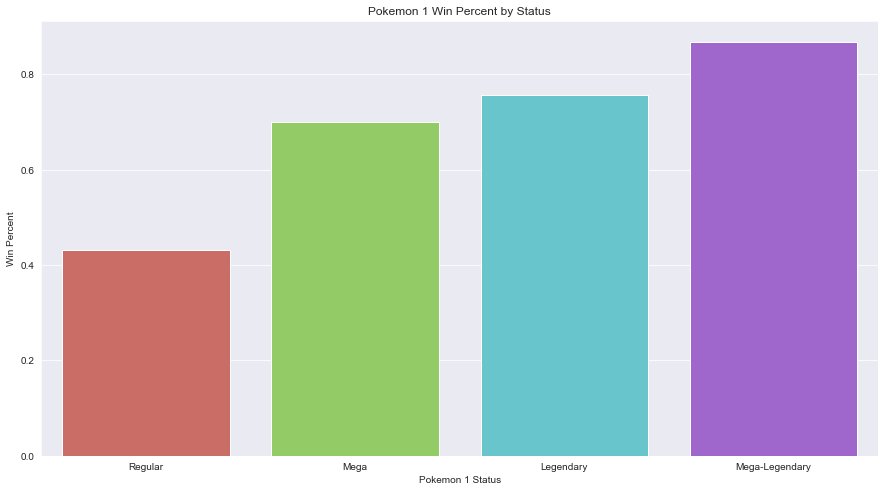

In [387]:
plt.figure(figsize=(15,8))
sns.barplot(x=['Regular', 'Mega', 'Legendary', 'Mega-Legendary'], y=[reg_wins, mega_wins, leg_wins, mega_leg_wins],
            palette='hls')
plt.xlabel('Pokemon 1 Status')
plt.ylabel('Win Percent')
plt.title('Pokemon 1 Win Percent by Status', size=12)
plt.show()

**Is win count independent of Pokemon status?**

- $H_{0}:$ Pokemon status and win count are independent
- $H_{A}:$ Pokemon status and win count are dependent

In [396]:
reg = temp[(temp.mega_p1==0)&(temp.legendary_p1==0)&(temp.mega_leg_p1==0)].p1_winner.value_counts()
mega = temp[temp.mega_p1==1].p1_winner.value_counts()
leg = temp[temp.legendary_p1==1].p1_winner.value_counts()
mega_leg = temp[temp.mega_leg_p1==1].p1_winner.value_counts()

In [415]:
# create contingency table
table = [[reg[0], reg[1]],
         [mega[0], mega[1]],
         [leg[0], leg[1]],
         [mega_leg[0], mega_leg[1]]]

stat, p, dof, expected = stats.chi2_contingency(table)
print(table)
print('dof=%d' % dof)
print(expected)

[[24494, 18622], [972, 2261], [990, 3096], [57, 378]]
dof=3
[[22471.68287792 20644.31712208]
 [ 1685.01138195  1547.98861805]
 [ 2129.58753686  1956.41246314]
 [  226.71820326   208.28179674]]


In [404]:
# interpret the ciritical stat
prob = 0.95
critical = stats.chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=7.815, stat=2549.187
Dependent (reject H0)


Our chi-squared test shows us that win count is dependent on whether a Pokemon status. In the bar chart above, we can see that as the status of the Pokemon gets better, its win percentage increases. Regular Pokemon have the lowest win percentage (about 43%) while Mega-Legendary Pokemon have the highest win percentage (about 87%).